# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Aditya Mulya Pratama
- **Email:** adityamulya871@gmail.com
- **ID Dicoding:** aditya_mulya_pratama

## Menentukan Pertanyaan Bisnis

- Jam berapa nilai kualitas udara berdasarkan parameter pm2.5 terbaik dan terburuk di kedua kota ?
- Tahun berapa yang memiliki kualiatas udara paling baik berdasarkan parameter PM2.5 ?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini dilakukan pemangilan dataset yang memuat semua tabel

In [ ]:
changping_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
changping_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


### Assessing Data

 Pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan.

In [ ]:
print("Jumlah duplikasi: ",Aotizhongxin_df.duplicated().sum())

Jumlah duplikasi:  0


Menilai tabel changping_df

In [ ]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ",changping_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Cleaning Data

Saya memutuskan untuk melakukan dropna untuk mengilangkan NaN pada dataset karena dataset yang diambil sepertinya didapat langsung dari lapangan apabila menggunkkan metode lain untuk mengisi data NaN tidak akan sesuai. Selain itu, setelah di drop data masih sebesar >32000 sehingga masih cukup banyak untuk dilakukan analisis data

In [73]:

changping_df.dropna(axis=0, inplace=True)

In [ ]:
changping_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35057,35058,2017,2,28,17,18.0,61.0,6.0,29.0,400.0,51.0,14.7,1007.4,-12.6,0.0,WNW,4.2,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [ ]:
changping_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [ ]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000
mean,17876.569658,2014.703130,6.507481,15.715156,11.506992,70.312328,94.086402,15.061357,44.319035,1151.716441,57.424541,13.401677,1007.994009,1.135299,0.060736,1.865757
std,10010.547363,1.165678,3.478965,8.729951,6.940587,70.955607,82.610340,21.057574,29.591375,1105.646637,53.792603,11.393462,10.177785,13.841226,0.765286,1.308218
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,9384.000000,2014.000000,3.000000,8.000000,6.000000,18.000000,33.000000,2.000000,22.000000,500.000000,15.000000,3.100000,999.500000,-10.600000,0.000000,1.000000
50%,17910.000000,2015.000000,7.000000,16.000000,11.000000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.100000,1007.700000,1.100000,0.000000,1.500000
75%,26546.000000,2016.000000,10.000000,23.000000,18.000000,99.000000,130.000000,18.000000,61.000000,1400.000000,79.000000,23.100000,1016.300000,13.900000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,662.000000,992.000000,310.000000,208.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


## Exploratory Data Analysis (EDA)

### Explore data rata-rata kualitas udara perjam untuk selama 2013-2017 kota changping

In [ ]:
changping_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681,32681.000000,32681
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4518,NaN,32681
mean,17876.569658,2014.703130,6.507481,15.715156,11.506992,70.312328,94.086402,15.061357,44.319035,1151.716441,57.424541,13.401677,1007.994009,1.135299,0.060736,NaN,1.865757,NaN
std,10010.547363,1.165678,3.478965,8.729951,6.940587,70.955607,82.610340,21.057574,29.591375,1105.646637,53.792603,11.393462,10.177785,13.841226,0.765286,NaN,1.308218,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,9384.000000,2014.000000,3.000000,8.000000,6.000000,18.000000,33.000000,2.000000,22.000000,500.000000,15.000000,3.100000,999.500000,-10.600000,0.000000,NaN,1.000000,NaN
50%,17910.000000,2015.000000,7.000000,16.000000,11.000000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.100000,1007.700000,1.100000,0.000000,NaN,1.500000,NaN
75%,26546.000000,2016.000000,10.000000,23.000000,18.000000,99.000000,130.000000,18.000000,61.000000,1400.000000,79.000000,23.100000,1016.300000,13.900000,0.000000,NaN,2.300000,NaN


In [ ]:
airquality_hour_df = changping_df.groupby(by="hour").agg({

    "PM2.5": ["max", "min", "mean", "std"],

})

In [ ]:
airquality_hour_df

PM2.5                           
        max  min       mean        std
hour                                  
0     505.0  3.0  71.483008  71.486731
1     491.0  3.0  71.155322  73.214851
2     539.0  3.0  68.083542  69.985342
3     527.0  3.0  66.809970  70.355570
4     406.0  3.0  64.544238  66.383477
5     438.0  3.0  62.978877  65.213233
6     469.0  3.0  62.762968  63.684045
7     479.0  3.0  63.114410  61.847906
8     476.0  3.0  66.657723  64.272802
9     488.0  3.0  71.057678  67.472101
10    581.0  3.0  75.988131  75.597800
11    560.0  3.0  75.071932  76.604334
12    662.0  3.0  73.703102  76.263977
13    544.0  3.0  71.653789  74.216195
14    500.0  3.0  69.579460  72.704321
15    463.0  3.0  68.798041  72.252427
16    458.0  3.0  67.475037  69.794033
17    471.0  3.0  68.917037  71.211036
18    453.0  3.0  71.580175  72.291876
19    448.0  3.0  74.894814  72.032232
20    477.0  3.0  76.611354  72.861003
21    523.0  3.0  76.920767  74.169969
22    495.0  3.0  74.375273  72.297503
23    478.0  3.0  72.968520  71.860654

Mencari rata-rata untuk setiap jam untuk kualitas udara di kota changping terlihat rata-rata nilai kualitas udara berdasarkan parameter PM2.5 adalah pada 76,92 di jam 21 dan yang terkecil pada jam 6 di angka 62,76 semakin besar angka nya semakin besar juga tingkat polusi udaranya

In [ ]:
air_quality_year_df = changping_df.groupby(by="year").agg({

    "PM2.5": ["max", "min", "mean", "std"],

})

In [ ]:
air_quality_year_df

PM2.5                           
        max  min       mean        std
year                                  
2013  443.0  3.0  70.793076  65.406569
2014  581.0  3.0  79.005075  77.415708
2015  500.0  3.0  69.377287  70.033174
2016  492.0  3.0  60.837451  62.588812
2017  662.0  3.0  79.469373  96.484397

untuk pertahun yang paling tinggi terjadi di 2017 dan terendah di 2016

## Visualization & Explanatory Analysis

### Pertanyaan 1: Jam berapa nilai kualitas udara berdasarkan parameter pm2.5 terbaik dan terburuk ?

In [55]:
airquality_hour_df

index level_0 hour  PM2.5                           
                         max  min       mean        std
0      0       0    0  505.0  3.0  71.483008  71.486731
1      1       1    1  491.0  3.0  71.155322  73.214851
2      2       2    2  539.0  3.0  68.083542  69.985342
3      3       3    3  527.0  3.0  66.809970  70.355570
4      4       4    4  406.0  3.0  64.544238  66.383477
5      5       5    5  438.0  3.0  62.978877  65.213233
6      6       6    6  469.0  3.0  62.762968  63.684045
7      7       7    7  479.0  3.0  63.114410  61.847906
8      8       8    8  476.0  3.0  66.657723  64.272802
9      9       9    9  488.0  3.0  71.057678  67.472101
10    10      10   10  581.0  3.0  75.988131  75.597800
11    11      11   11  560.0  3.0  75.071932  76.604334
12    12      12   12  662.0  3.0  73.703102  76.263977
13    13      13   13  544.0  3.0  71.653789  74.216195
14    14      14   14  500.0  3.0  69.579460  72.704321
15    15      15   15  463.0  3.0  68.798041  72.252427
16    16      16   16  458.0  3.0  67.475037  69.794033
17    17      17   17  471.0  3.0  68.917037  71.211036
18    18      18   18  453.0  3.0  71.580175  72.291876
19    19      19   19  448.0  3.0  74.894814  72.032232
20    20      20   20  477.0  3.0  76.611354  72.861003
21    21      21   21  523.0  3.0  76.920767  74.169969
22    22      22   22  495.0  3.0  74.375273  72.297503
23    23      23   23  478.0  3.0  72.968520  71.860654

In [56]:
airquality_hour_df = airquality_hour_df.drop(columns=['level_0', 'index'])

<ipython-input-56-b8bc3ddbdb1e>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  airquality_hour_df = airquality_hour_df.drop(columns=['level_0', 'index'])


In [57]:
airquality_hour_df

hour  PM2.5                           
           max  min       mean        std
0     0  505.0  3.0  71.483008  71.486731
1     1  491.0  3.0  71.155322  73.214851
2     2  539.0  3.0  68.083542  69.985342
3     3  527.0  3.0  66.809970  70.355570
4     4  406.0  3.0  64.544238  66.383477
5     5  438.0  3.0  62.978877  65.213233
6     6  469.0  3.0  62.762968  63.684045
7     7  479.0  3.0  63.114410  61.847906
8     8  476.0  3.0  66.657723  64.272802
9     9  488.0  3.0  71.057678  67.472101
10   10  581.0  3.0  75.988131  75.597800
11   11  560.0  3.0  75.071932  76.604334
12   12  662.0  3.0  73.703102  76.263977
13   13  544.0  3.0  71.653789  74.216195
14   14  500.0  3.0  69.579460  72.704321
15   15  463.0  3.0  68.798041  72.252427
16   16  458.0  3.0  67.475037  69.794033
17   17  471.0  3.0  68.917037  71.211036
18   18  453.0  3.0  71.580175  72.291876
19   19  448.0  3.0  74.894814  72.032232
20   20  477.0  3.0  76.611354  72.861003
21   21  523.0  3.0  76.920767  74.169969
22   22  495.0  3.0  74.375273  72.297503
23   23  478.0  3.0  72.968520  71.860654

In [61]:
mean_PM25_per_hour = airquality_hour_df['PM2.5']['mean']

In [62]:
mean_PM25_per_hour

0     71.483008
1     71.155322
2     68.083542
3     66.809970
4     64.544238
5     62.978877
6     62.762968
7     63.114410
8     66.657723
9     71.057678
10    75.988131
11    75.071932
12    73.703102
13    71.653789
14    69.579460
15    68.798041
16    67.475037
17    68.917037
18    71.580175
19    74.894814
20    76.611354
21    76.920767
22    74.375273
23    72.968520
Name: mean, dtype: float64

<ipython-input-71-e6eb8fa8cba6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


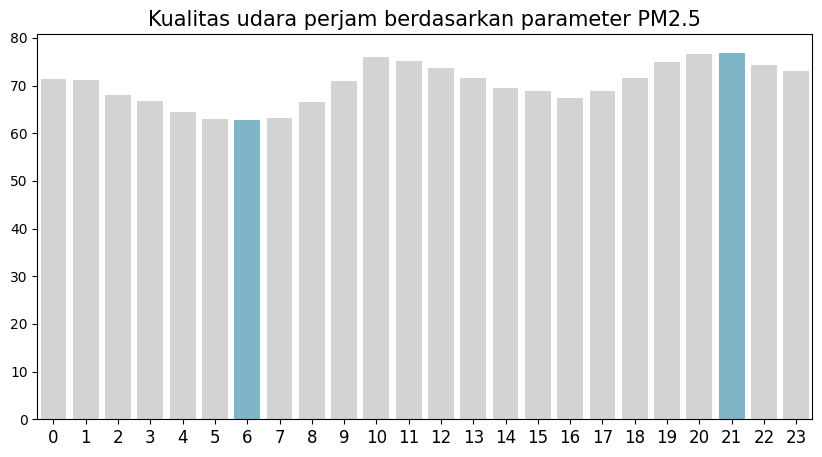

In [71]:

plt.figure(figsize=(10, 5))

colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3",
           "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",
           "#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y= mean_PM25_per_hour,
    x= 'hour',
    data=airquality_hour_df,
    palette=colors_
)
plt.title("Kualitas udara perjam berdasarkan parameter PM2.5", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Tahun berapa yang memiliki kualiatas udara paling baik berdasarkan parameter PM2.5 ?

In [74]:
air_quality_year_df

PM2.5                           
        max  min       mean        std
year                                  
2013  443.0  3.0  70.793076  65.406569
2014  581.0  3.0  79.005075  77.415708
2015  500.0  3.0  69.377287  70.033174
2016  492.0  3.0  60.837451  62.588812
2017  662.0  3.0  79.469373  96.484397

In [77]:
airquality_year_df = air_quality_year_df.reset_index()

In [78]:
airquality_year_df

year  PM2.5                           
           max  min       mean        std
0  2013  443.0  3.0  70.793076  65.406569
1  2014  581.0  3.0  79.005075  77.415708
2  2015  500.0  3.0  69.377287  70.033174
3  2016  492.0  3.0  60.837451  62.588812
4  2017  662.0  3.0  79.469373  96.484397

In [80]:
mean_PM25_per_year = airquality_year_df['PM2.5']['mean']

In [81]:
mean_PM25_per_year

0    70.793076
1    79.005075
2    69.377287
3    60.837451
4    79.469373
Name: mean, dtype: float64

<ipython-input-85-2f73409469e2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


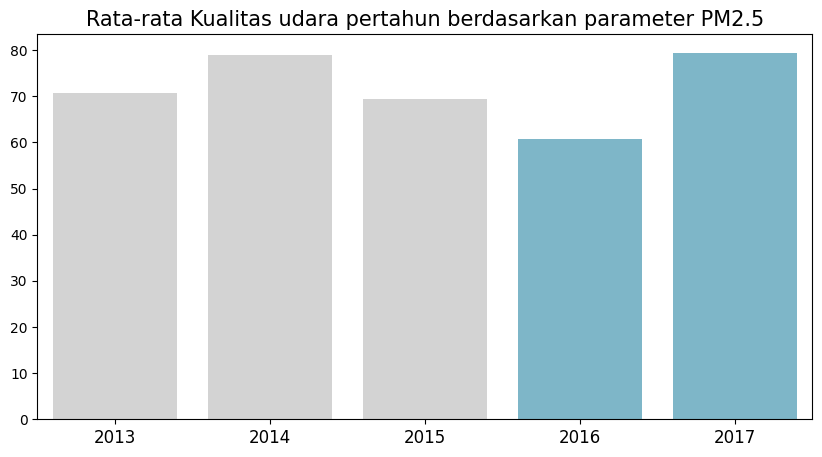

In [85]:
plt.figure(figsize=(10, 5))

colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3","#72BCD4", "#72BCD4", ]

sns.barplot(
    y= mean_PM25_per_year,
    x= 'year',
    data=airquality_year_df,
    palette=colors_
)
plt.title("Rata-rata Kualitas udara pertahun berdasarkan parameter PM2.5", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

Parameter PM 2.5 adalah nilai dari kualitas udara yang berdasarkan sumber emisi, kendaraan , minyak , bensin , solar, dan lain-lain yang berbahaya jika dihirup manusia

- Conclution pertanyaan 1 : Kualitas udara paling buruk rata-rata terjadi di jam 21 karena memiliki nilai PM2.5 tertinggi dan kualitas udara paling bagus terjadi di jam 7 karena nilai PM2,5 rendah
- Conclution pertanyaan 2 : Kualitas udara rata-rata pada tahun 2017 paling buruk sedangkan pada 2016 adalah kualitas udara rata-rata paling baik